In [3]:
import pandas as pd
from pandas.io import sql
import json
import regex as re
import psycopg2
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests as rq
from bs4 import BeautifulSoup

sns.set_style('whitegrid')
%matplotlib inline

In [5]:
omdb=pd.read_json('../data/omdb_data.json',orient='records')

In [4]:
itunes=pd.read_json('./data/itunes_data.json',orient='records')

In [5]:
itunes.columns

Index(['artistId', 'artistName', 'artistViewUrl', 'artworkUrl100',
       'artworkUrl30', 'artworkUrl60', 'collectionArtistId',
       'collectionArtistViewUrl', 'collectionCensoredName',
       'collectionExplicitness', 'collectionHdPrice', 'collectionId',
       'collectionName', 'collectionPrice', 'collectionType',
       'collectionViewUrl', 'contentAdvisoryRating', 'copyright', 'country',
       'currency', 'discCount', 'discNumber', 'hasITunesExtras', 'kind',
       'longDescription', 'previewUrl', 'primaryGenreName', 'releaseDate',
       'shortDescription', 'trackCensoredName', 'trackCount',
       'trackExplicitness', 'trackHdPrice', 'trackHdRentalPrice', 'trackId',
       'trackName', 'trackNumber', 'trackPrice', 'trackRentalPrice',
       'trackTimeMillis', 'trackViewUrl', 'wrapperType'],
      dtype='object')

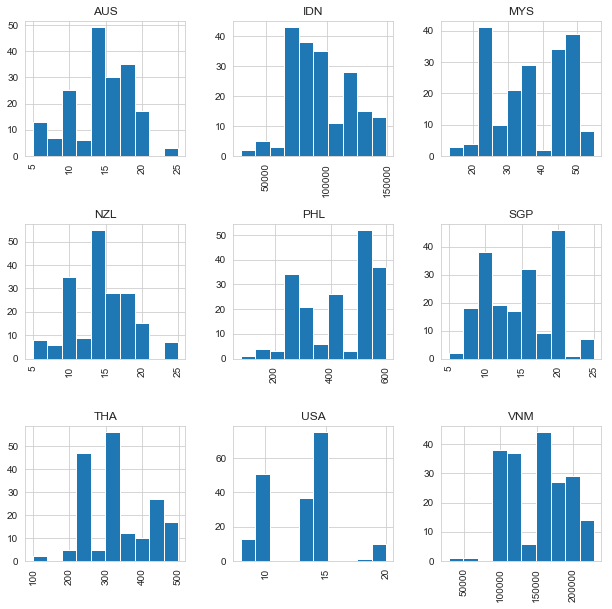

In [6]:
itunes['trackPrice'].hist(by=itunes['country'],figsize=(10,10))
plt.show()


In [6]:
omdb.columns

Index(['Actors', 'Awards', 'BoxOffice', 'Country', 'DVD', 'Director',
       'Episode', 'Genre', 'IMdb_score', 'Language', 'Metacritic_score',
       'Metascore', 'Plot', 'Poster', 'Production', 'RT_score', 'Rated',
       'Released', 'Response', 'Runtime', 'Season', 'Title', 'Type', 'Website',
       'Writer', 'Year', 'actor_1', 'actor_2', 'director_1', 'director_2',
       'imdbID', 'imdbRating', 'imdbVotes', 'num_actor', 'num_director',
       'seriesID', 'totalSeasons'],
      dtype='object')

In [39]:
mojo=pd.read_csv('./data/annual_mojo.csv')

In [40]:
mojo.head()

,Unnamed: 0,bo_year_rank,title,studio,worldwide-gross,domestic-gross,domestic-pct,overseas-gross,overseas-pct,bo_year
0,0,1,Indiana Jones and the Last Crusade,Par.,474200000.0,197200000.0,41.6,277000000.0,58.4,1989
1,1,2,Batman,WB,411300000.0,251200000.0,61.1,160200000.0,38.9,1989
2,2,3,Back to the Future Part II,Uni.,332000000.0,118500000.0,35.7,213500000.0,64.3,1989
3,3,4,Look Whos Talking,TriS,297000000.0,140100000.0,47.2,156900000.0,52.8,1989
4,4,5,Dead Poets Society,BV,235900000.0,95900000.0,40.6,140000000.0,59.4,1989


In [11]:
def parse_title(title):
    title_no_brack=re.sub(r' \([^)]*\)', '',title)
    title_without_punctuation=re.sub(r"[^\w\d-'\s]",'',title_no_brack)
    title_without_punctuation_double_space=title_without_punctuation.replace('  ',' ') 
    search_str=title_without_punctuation_double_space.replace(' ','+')
    return search_str


In [41]:
mojo['search_strs']=mojo['title'].apply(lambda x: parse_title(x))

In [15]:
omdb_search=pd.read_json('./data/OMdb_search_dat.json')

In [31]:
omdb_search.columns

Index(['IMdb_id', 'TMdb_id', 'itunes_id', 'search_strs', 'titles', 'years'], dtype='object')

In [30]:
mojo.merge(omdb_search)

(7389, 12)

In [27]:
mojo['search_strs'][1]+'+'+str(mojo['bo_year'][1])

'Batman+1989'

In [43]:
def google_for_mojo(df):

    df['IMdb_id']=np.nan
    successful_hits=0
    no_hits=0
    for a in df.index:
        print(str(a)+' movies googled')
        # Google 'Movie Name' + 'imdb' using BS#
        r=rq.get('https://www.google.com/search?q=%s+%s+imdb'% (df['search_strs'][a],df['bo_year'][a] )) 
        p= BeautifulSoup(r.text,'html.parser')
        
        # Take the first search result hyper link # 
        
        try:
            first_google_hit=p.find_all('h3', {'class':'r'})[0] 
            m=re.search('title/(.+?)/&',str(first_google_hit))
            IMDB_id=m.group(1)
            df['IMdb_id'][a]=IMDB_id
            successful_hits+=1
        except:
            no_hits+=1
    
    print('Successful IMDB_ids found via Google = ' + str(successful_hits) + ' No results = '+ str(no_hits))

    return df
    



In [ ]:
mojo_new=google_for_mojo(mojo)

0 movies googled
1 movies googled
2 movies googled
3 movies googled
4 movies googled
5 movies googled
6 movies googled
7 movies googled
8 movies googled
9 movies googled
10 movies googled
11 movies googled
12 movies googled
13 movies googled
14 movies googled
15 movies googled
16 movies googled
17 movies googled
18 movies googled
19 movies googled
20 movies googled
21 movies googled
22 movies googled
23 movies googled
24 movies googled
25 movies googled
26 movies googled
27 movies googled
28 movies googled
29 movies googled
30 movies googled
31 movies googled
32 movies googled
33 movies googled
34 movies googled
35 movies googled
36 movies googled
37 movies googled
38 movies googled
39 movies googled
40 movies googled
41 movies googled
42 movies googled
43 movies googled
44 movies googled
45 movies googled
46 movies googled
47 movies googled
48 movies googled
49 movies googled
50 movies googled
51 movies googled
52 movies googled
53 movies googled
54 movies googled
55 movies googled
56

437 movies googled
438 movies googled
439 movies googled
440 movies googled
441 movies googled
442 movies googled
443 movies googled
444 movies googled
445 movies googled
446 movies googled
447 movies googled
448 movies googled
449 movies googled
450 movies googled
451 movies googled
452 movies googled
453 movies googled
454 movies googled
455 movies googled
456 movies googled
457 movies googled
458 movies googled
459 movies googled
460 movies googled
461 movies googled
462 movies googled
463 movies googled
464 movies googled
465 movies googled
466 movies googled
467 movies googled
468 movies googled
469 movies googled
470 movies googled
471 movies googled
472 movies googled
473 movies googled
474 movies googled
475 movies googled
476 movies googled
477 movies googled
478 movies googled
479 movies googled
480 movies googled
481 movies googled
482 movies googled
483 movies googled
484 movies googled
485 movies googled
486 movies googled
487 movies googled
488 movies googled
489 movies g

869 movies googled
870 movies googled
871 movies googled
872 movies googled
873 movies googled
874 movies googled
875 movies googled
876 movies googled
877 movies googled
878 movies googled
879 movies googled
880 movies googled
881 movies googled
882 movies googled
883 movies googled
884 movies googled
885 movies googled
886 movies googled
887 movies googled
888 movies googled
889 movies googled
890 movies googled
891 movies googled
892 movies googled
893 movies googled
894 movies googled
895 movies googled
896 movies googled
897 movies googled
898 movies googled
899 movies googled
900 movies googled
901 movies googled
902 movies googled
903 movies googled
904 movies googled
905 movies googled
906 movies googled
907 movies googled
908 movies googled
909 movies googled
910 movies googled
911 movies googled
912 movies googled
913 movies googled
914 movies googled
915 movies googled
916 movies googled
917 movies googled
918 movies googled
919 movies googled
920 movies googled
921 movies g

1286 movies googled
1287 movies googled
1288 movies googled
1289 movies googled
1290 movies googled
1291 movies googled
1292 movies googled
1293 movies googled
1294 movies googled
1295 movies googled
1296 movies googled
1297 movies googled
1298 movies googled
1299 movies googled
1300 movies googled
1301 movies googled
1302 movies googled
1303 movies googled
1304 movies googled
1305 movies googled
1306 movies googled
1307 movies googled
1308 movies googled
1309 movies googled
1310 movies googled
1311 movies googled
1312 movies googled
1313 movies googled
1314 movies googled
1315 movies googled
1316 movies googled
1317 movies googled
1318 movies googled
1319 movies googled
1320 movies googled
1321 movies googled
1322 movies googled
1323 movies googled
1324 movies googled
1325 movies googled
1326 movies googled
1327 movies googled
1328 movies googled
1329 movies googled
1330 movies googled
1331 movies googled
1332 movies googled
1333 movies googled
1334 movies googled
1335 movies googled


1696 movies googled
1697 movies googled
1698 movies googled
1699 movies googled
1700 movies googled
1701 movies googled
1702 movies googled
1703 movies googled
1704 movies googled
1705 movies googled
1706 movies googled
1707 movies googled
1708 movies googled
1709 movies googled
1710 movies googled
1711 movies googled
1712 movies googled
1713 movies googled
1714 movies googled
1715 movies googled
1716 movies googled
1717 movies googled
1718 movies googled
1719 movies googled
1720 movies googled
1721 movies googled
1722 movies googled
1723 movies googled
1724 movies googled
1725 movies googled
1726 movies googled
1727 movies googled
1728 movies googled
1729 movies googled
1730 movies googled
1731 movies googled
1732 movies googled
1733 movies googled
1734 movies googled
1735 movies googled
1736 movies googled
1737 movies googled
1738 movies googled
1739 movies googled
1740 movies googled
1741 movies googled
1742 movies googled
1743 movies googled
1744 movies googled
1745 movies googled


2106 movies googled
2107 movies googled
2108 movies googled
2109 movies googled
2110 movies googled
2111 movies googled
2112 movies googled
2113 movies googled
2114 movies googled
2115 movies googled
2116 movies googled
2117 movies googled
2118 movies googled
2119 movies googled
2120 movies googled
2121 movies googled
2122 movies googled
2123 movies googled
2124 movies googled
2125 movies googled
2126 movies googled
2127 movies googled
2128 movies googled
2129 movies googled
2130 movies googled
2131 movies googled
2132 movies googled
2133 movies googled
2134 movies googled
2135 movies googled
2136 movies googled
2137 movies googled
2138 movies googled
2139 movies googled
2140 movies googled
2141 movies googled
2142 movies googled
2143 movies googled
2144 movies googled
2145 movies googled
2146 movies googled
2147 movies googled
2148 movies googled
2149 movies googled
2150 movies googled
2151 movies googled
2152 movies googled
2153 movies googled
2154 movies googled
2155 movies googled


2516 movies googled
2517 movies googled
2518 movies googled
2519 movies googled
2520 movies googled
2521 movies googled
2522 movies googled
2523 movies googled
2524 movies googled
2525 movies googled
2526 movies googled
2527 movies googled
2528 movies googled
2529 movies googled
2530 movies googled
2531 movies googled
2532 movies googled
2533 movies googled
2534 movies googled
2535 movies googled
2536 movies googled
2537 movies googled
2538 movies googled
2539 movies googled
2540 movies googled
2541 movies googled
2542 movies googled
2543 movies googled
2544 movies googled
2545 movies googled
2546 movies googled
2547 movies googled
2548 movies googled
2549 movies googled
2550 movies googled
2551 movies googled
2552 movies googled
2553 movies googled
2554 movies googled
2555 movies googled
2556 movies googled
2557 movies googled
2558 movies googled
2559 movies googled
2560 movies googled
2561 movies googled
2562 movies googled
2563 movies googled
2564 movies googled
2565 movies googled


2926 movies googled
2927 movies googled
2928 movies googled
2929 movies googled
2930 movies googled
2931 movies googled
2932 movies googled
2933 movies googled
2934 movies googled
2935 movies googled
2936 movies googled
2937 movies googled
2938 movies googled
2939 movies googled
2940 movies googled
2941 movies googled
2942 movies googled
2943 movies googled
2944 movies googled
2945 movies googled
2946 movies googled
2947 movies googled
2948 movies googled
2949 movies googled
2950 movies googled
2951 movies googled
2952 movies googled
2953 movies googled
2954 movies googled
2955 movies googled
2956 movies googled
2957 movies googled
2958 movies googled
2959 movies googled
2960 movies googled
2961 movies googled
2962 movies googled
2963 movies googled
2964 movies googled
2965 movies googled
2966 movies googled
2967 movies googled
2968 movies googled
2969 movies googled
2970 movies googled
2971 movies googled
2972 movies googled
2973 movies googled
2974 movies googled
2975 movies googled


3336 movies googled
3337 movies googled
3338 movies googled
3339 movies googled
3340 movies googled
3341 movies googled
3342 movies googled
3343 movies googled
3344 movies googled
3345 movies googled
3346 movies googled
3347 movies googled
3348 movies googled
3349 movies googled
3350 movies googled
3351 movies googled
3352 movies googled
3353 movies googled
3354 movies googled
3355 movies googled
3356 movies googled
3357 movies googled
3358 movies googled
3359 movies googled
3360 movies googled
3361 movies googled
3362 movies googled
3363 movies googled
3364 movies googled
3365 movies googled
3366 movies googled
3367 movies googled
3368 movies googled
3369 movies googled
3370 movies googled
3371 movies googled
3372 movies googled
3373 movies googled
3374 movies googled
3375 movies googled
3376 movies googled
3377 movies googled
3378 movies googled
3379 movies googled
3380 movies googled
3381 movies googled
3382 movies googled
3383 movies googled
3384 movies googled
3385 movies googled


3746 movies googled
3747 movies googled
3748 movies googled
3749 movies googled
3750 movies googled
3751 movies googled
3752 movies googled
3753 movies googled
3754 movies googled
3755 movies googled
3756 movies googled
3757 movies googled
3758 movies googled
3759 movies googled
3760 movies googled
3761 movies googled
3762 movies googled
3763 movies googled
3764 movies googled
3765 movies googled
3766 movies googled
3767 movies googled
3768 movies googled
3769 movies googled
3770 movies googled
3771 movies googled
3772 movies googled
3773 movies googled
3774 movies googled
3775 movies googled
3776 movies googled
3777 movies googled
3778 movies googled
3779 movies googled
3780 movies googled
3781 movies googled
3782 movies googled
3783 movies googled
3784 movies googled
3785 movies googled
3786 movies googled
3787 movies googled
3788 movies googled
3789 movies googled
3790 movies googled
3791 movies googled
3792 movies googled
3793 movies googled
3794 movies googled
3795 movies googled


4156 movies googled
4157 movies googled
4158 movies googled
4159 movies googled
4160 movies googled
4161 movies googled
4162 movies googled
4163 movies googled
4164 movies googled
4165 movies googled
4166 movies googled
4167 movies googled
4168 movies googled
4169 movies googled
4170 movies googled
4171 movies googled
4172 movies googled
4173 movies googled
4174 movies googled
4175 movies googled
4176 movies googled
4177 movies googled
4178 movies googled
4179 movies googled
4180 movies googled
4181 movies googled
4182 movies googled
4183 movies googled
4184 movies googled
4185 movies googled
4186 movies googled
4187 movies googled
4188 movies googled
4189 movies googled
4190 movies googled
4191 movies googled
4192 movies googled
4193 movies googled
4194 movies googled
4195 movies googled
4196 movies googled
4197 movies googled
4198 movies googled
4199 movies googled
4200 movies googled
4201 movies googled
4202 movies googled
4203 movies googled
4204 movies googled
4205 movies googled


4566 movies googled
4567 movies googled
4568 movies googled
4569 movies googled
4570 movies googled
4571 movies googled
4572 movies googled
4573 movies googled
4574 movies googled
4575 movies googled
4576 movies googled
4577 movies googled
4578 movies googled
4579 movies googled
4580 movies googled
4581 movies googled
4582 movies googled
4583 movies googled
4584 movies googled
4585 movies googled
4586 movies googled
4587 movies googled
4588 movies googled
4589 movies googled
4590 movies googled
4591 movies googled
4592 movies googled
4593 movies googled
4594 movies googled
4595 movies googled
4596 movies googled
4597 movies googled
4598 movies googled
4599 movies googled
4600 movies googled
4601 movies googled
4602 movies googled
4603 movies googled
4604 movies googled
4605 movies googled
4606 movies googled
4607 movies googled
4608 movies googled
4609 movies googled
4610 movies googled
4611 movies googled
4612 movies googled
4613 movies googled
4614 movies googled
4615 movies googled


4976 movies googled
4977 movies googled
4978 movies googled
4979 movies googled
4980 movies googled
4981 movies googled
4982 movies googled
4983 movies googled
4984 movies googled
4985 movies googled
4986 movies googled
4987 movies googled
4988 movies googled
4989 movies googled
4990 movies googled
4991 movies googled
4992 movies googled
4993 movies googled
4994 movies googled
4995 movies googled
4996 movies googled
4997 movies googled
4998 movies googled
4999 movies googled
5000 movies googled
5001 movies googled
5002 movies googled
5003 movies googled
5004 movies googled
5005 movies googled
5006 movies googled
5007 movies googled
5008 movies googled
5009 movies googled
5010 movies googled
5011 movies googled
5012 movies googled
5013 movies googled
5014 movies googled
5015 movies googled
5016 movies googled
5017 movies googled
5018 movies googled
5019 movies googled
5020 movies googled
5021 movies googled
5022 movies googled
5023 movies googled
5024 movies googled
5025 movies googled


5386 movies googled
5387 movies googled
5388 movies googled
5389 movies googled
5390 movies googled
5391 movies googled
5392 movies googled
5393 movies googled
5394 movies googled
5395 movies googled
5396 movies googled
5397 movies googled
5398 movies googled
5399 movies googled
5400 movies googled
5401 movies googled
5402 movies googled
5403 movies googled
5404 movies googled
5405 movies googled
5406 movies googled
5407 movies googled
5408 movies googled
5409 movies googled
5410 movies googled
5411 movies googled
5412 movies googled
5413 movies googled
5414 movies googled
5415 movies googled
5416 movies googled
5417 movies googled
5418 movies googled
5419 movies googled
5420 movies googled
5421 movies googled
5422 movies googled
5423 movies googled
5424 movies googled
5425 movies googled
5426 movies googled
5427 movies googled
5428 movies googled
5429 movies googled
5430 movies googled
5431 movies googled
5432 movies googled
5433 movies googled
5434 movies googled
5435 movies googled


5796 movies googled
5797 movies googled
5798 movies googled
5799 movies googled
5800 movies googled
5801 movies googled
5802 movies googled
5803 movies googled
5804 movies googled
5805 movies googled
5806 movies googled
5807 movies googled
5808 movies googled
5809 movies googled
5810 movies googled
5811 movies googled
5812 movies googled
5813 movies googled
5814 movies googled
5815 movies googled
5816 movies googled
5817 movies googled
5818 movies googled
5819 movies googled
5820 movies googled
5821 movies googled
5822 movies googled
5823 movies googled
5824 movies googled
5825 movies googled
5826 movies googled
5827 movies googled
5828 movies googled
5829 movies googled
5830 movies googled
5831 movies googled
5832 movies googled
5833 movies googled
5834 movies googled
5835 movies googled
5836 movies googled
5837 movies googled
5838 movies googled
5839 movies googled
5840 movies googled
5841 movies googled
5842 movies googled
5843 movies googled
5844 movies googled
5845 movies googled


6206 movies googled
6207 movies googled
6208 movies googled
6209 movies googled
6210 movies googled
6211 movies googled
6212 movies googled
6213 movies googled
6214 movies googled
6215 movies googled
6216 movies googled
6217 movies googled
6218 movies googled
6219 movies googled
6220 movies googled
6221 movies googled
6222 movies googled
6223 movies googled
6224 movies googled
6225 movies googled
6226 movies googled
6227 movies googled
6228 movies googled
6229 movies googled
6230 movies googled
6231 movies googled
6232 movies googled
6233 movies googled
6234 movies googled
6235 movies googled
6236 movies googled
6237 movies googled
6238 movies googled
6239 movies googled
6240 movies googled
6241 movies googled
6242 movies googled
6243 movies googled
6244 movies googled
6245 movies googled
6246 movies googled
6247 movies googled
6248 movies googled
6249 movies googled
6250 movies googled
6251 movies googled
6252 movies googled
6253 movies googled
6254 movies googled
6255 movies googled


6616 movies googled
6617 movies googled
6618 movies googled
6619 movies googled
6620 movies googled
6621 movies googled
6622 movies googled
6623 movies googled
6624 movies googled
6625 movies googled
6626 movies googled
6627 movies googled
6628 movies googled
6629 movies googled
6630 movies googled
6631 movies googled
6632 movies googled
6633 movies googled
6634 movies googled
6635 movies googled
6636 movies googled
6637 movies googled
6638 movies googled
6639 movies googled
6640 movies googled
6641 movies googled
6642 movies googled
6643 movies googled
6644 movies googled
6645 movies googled
6646 movies googled
6647 movies googled
6648 movies googled
6649 movies googled
6650 movies googled
6651 movies googled
6652 movies googled
6653 movies googled
6654 movies googled
6655 movies googled
6656 movies googled
6657 movies googled
6658 movies googled
6659 movies googled
6660 movies googled
6661 movies googled
6662 movies googled
6663 movies googled
6664 movies googled
6665 movies googled


7026 movies googled
7027 movies googled
7028 movies googled
7029 movies googled
7030 movies googled
7031 movies googled
7032 movies googled
7033 movies googled
7034 movies googled
7035 movies googled
7036 movies googled
7037 movies googled
7038 movies googled
7039 movies googled
7040 movies googled
7041 movies googled
7042 movies googled
